In [1]:
import tensorflow as tf
tf.__version__

'2.15.0'

In [2]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [83]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU, PReLU, ELU, ReLU
from tensorflow.keras.layers import Dropout

In [6]:
df = pd.read_csv('/content/drive/MyDrive/YogeshuSenpai/churn.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
# divide data into independent and dependent
x= df.iloc[:, 3:13]
y = df.iloc[:,-1]

In [8]:
# Feature enginerring
geography=pd.get_dummies(x['Geography'], drop_first=True)
gender=pd.get_dummies(x['Gender'], drop_first=True)

In [9]:
# Concatenate these variables with dataframe
x=x.drop(['Geography', 'Gender'], axis=1)
x=pd.concat([x, geography, gender], axis=1)

In [66]:
# Splitting the dataset into train and test
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [67]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [68]:
# Creating the ANN
classifier=Sequential()

In [69]:
# Adding input layer
classifier.add(Dense(units=11, activation='relu'))

In [70]:
# Adding first hidden layer
classifier.add(Dense(units=7, activation='relu'))
classifier.add(Dropout(0.2))

In [71]:
# Adding second hidden layer
classifier.add(Dense(units=6, activation='relu'))
classifier.add(Dropout(0.2))

In [72]:
# Adding the output layer
classifier.add(Dense(1, activation='sigmoid'))

In [73]:
classifier.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [74]:
opt=tf.keras.optimizers.Adam(learning_rate=0.01)

In [75]:
# Early stopping
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=0,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [76]:
model_history=classifier.fit(x_train,y_train, validation_split=0.33, batch_size=10, epochs=1000, callbacks=early_stopping)

Epoch 1/1000
536/536 [==============================] - 4s 5ms/step - loss: 0.4635 - accuracy: 0.8095 - val_loss: 0.4019 - val_accuracy: 0.8285
Epoch 2/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.3995 - accuracy: 0.8308 - val_loss: 0.3887 - val_accuracy: 0.8357
Epoch 3/1000
536/536 [==============================] - 2s 5ms/step - loss: 0.3945 - accuracy: 0.8354 - val_loss: 0.3801 - val_accuracy: 0.8379
Epoch 4/1000
536/536 [==============================] - 4s 8ms/step - loss: 0.3872 - accuracy: 0.8373 - val_loss: 0.3780 - val_accuracy: 0.8368
Epoch 5/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.3786 - accuracy: 0.8444 - val_loss: 0.3735 - val_accuracy: 0.8387
Epoch 6/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.3714 - accuracy: 0.8487 - val_loss: 0.3679 - val_accuracy: 0.8466
Epoch 7/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.3730 - accuracy: 0.8477 - val_loss: 0.3649 - val_accuracy:

In [77]:
model_history.history.keys() #since we hace stopped our model this wont run

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

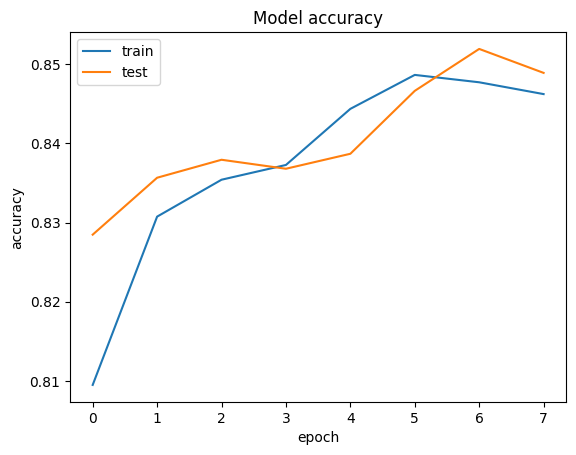

In [78]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

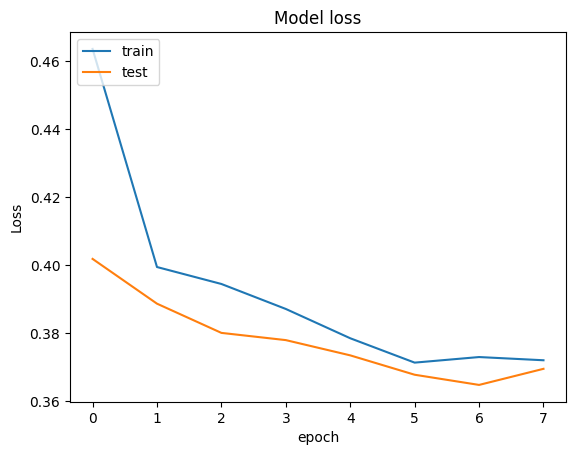

In [79]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [80]:
# Make the prediction and evaluate the model
y_pred=classifier.predict(x_test)
y_pred=(y_pred >= 0.5)

63/63 [==============================] - 0s 2ms/step


In [81]:
# make the confusion metrics
cm=confusion_matrix(y_test, y_pred)
cm

array([[1551,   56],
       [ 237,  156]])

In [82]:
# Calculate the accuracy
score=accuracy_score(y_pred,y_test)
score

0.8535